<a href="https://colab.research.google.com/github/Prithviraj2706/DS-training/blob/main/Newspaper_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step1 importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/content/NewspaperData.csv')

In [3]:
dataset.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
dataset.info

<bound method DataFrame.info of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayun

In [5]:
dataset.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [8]:
#replace missing values with mean values
X=dataset.iloc[:,1].values
y=dataset.iloc[:,-1].values

In [9]:
X

array([ 391.952,  516.981,  355.628,  238.555,  537.78 ,  733.775,
        198.832,  252.624,  206.204,  231.177,  449.755,  288.571,
        185.736, 1164.388,  444.581,  412.871,  272.28 ,  781.796,
       1209.225,  825.512,  223.748,  354.843,  515.523,  220.465,
        337.672,  197.12 ,  133.239,  374.009,  273.844,  570.364,
        391.286,  201.86 ,  321.626,  838.902])

In [10]:
y

array([ 488.506,  798.298,  235.084,  299.451,  559.093, 1133.249,
        348.744,  417.779,  344.522,  323.084,  620.752,  423.305,
        202.614, 1531.527,  553.479,  685.975,  324.241,  983.24 ,
       1762.015,  960.308,  284.611,  407.76 ,  982.663,  557.   ,
        440.923,  268.06 ,  262.048,  432.502,  338.355,  704.322,
        585.681,  267.781,  408.343, 1165.567])

In [11]:
#Splitting the dataset into the Training set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [12]:
X_test

array([288.571, 223.748, 197.12 , 781.796, 355.628, 133.239, 201.86 ])

In [13]:
X_train

array([ 272.28 ,  449.755,  838.902,  391.286,  337.672,  412.871,
        206.204, 1164.388,  273.844,  733.775,  444.581,  570.364,
        515.523,  516.981,  185.736,  198.832,  220.465,  537.78 ,
       1209.225,  354.843,  825.512,  231.177,  252.624,  321.626,
        374.009,  238.555,  391.952])

In [14]:
y_test

array([423.305, 284.611, 268.06 , 983.24 , 235.084, 262.048, 267.781])

In [15]:
y_train

array([ 324.241,  620.752, 1165.567,  585.681,  440.923,  685.975,
        344.522, 1531.527,  338.355, 1133.249,  553.479,  704.322,
        982.663,  798.298,  202.614,  348.744,  557.   ,  559.093,
       1762.015,  407.76 ,  960.308,  323.084,  417.779,  408.343,
        432.502,  299.451,  488.506])

In [17]:
#apply model
#fitiing the simple linear regrssion to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [19]:
#predivcting the test set results
y_pred=regressor.predict(X_test.reshape(-1,1))

In [20]:
y_pred

array([[ 410.44330081],
       [ 323.24161439],
       [ 287.42089481],
       [1073.94316634],
       [ 500.65022561],
       [ 201.48641275],
       [ 293.79727346]])

In [21]:
y_test

array([423.305, 284.611, 268.06 , 983.24 , 235.084, 262.048, 267.781])

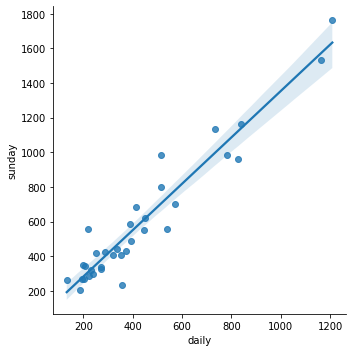

In [25]:
import seaborn as sns
sns.lmplot(x="daily",y="sunday",data=dataset)

In [23]:
newsdata=pd.Series([1000,1500])
data_pred=pd.DataFrame(newsdata,columns=['daily'])
data_pred

,daily
0,1000
1,1500


In [26]:
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[1367.47720184],
       [2040.09098412]])

In [28]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data= dataset).fit()

In [30]:
#r square
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [31]:
model.predict(data_pred)

0    1353.550388
1    2023.407766
dtype: float64